<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220706.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta
import plotnine as gg 
from plotnine import ggplot, aes 
import os 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.impute import KNNImputer 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [23]:
raw = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv')
raw = raw.drop(['id', 'date', 'zipcode'], axis = 1)
raw.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [24]:
raw.yr_built = 2022 - raw.yr_built
raw.yr_renovated = np.where(raw.yr_renovated != 0, 2022 - raw.yr_renovated, 500)
raw.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,67,500,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,71,31,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,89,500,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,57,500,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,35,500,47.6168,-122.045,1800,7503


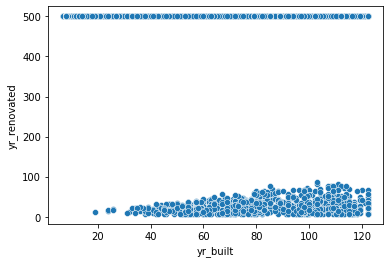

In [25]:
sns.scatterplot(data = raw, x = 'yr_built', y = 'yr_renovated')

In [29]:
raw['renovate_type'] = np.select([(raw.yr_renovated >= 500) & (raw.yr_built <= 20), 
                                  (raw.yr_renovated >= 500) & (raw.yr_built > 20),
                                  (raw.yr_built <= 40)&(raw.yr_renovated <= 20),
                                  (raw.yr_built <= 60)&(raw.yr_renovated <= 40),
                                  (raw.yr_built <= 80)&(raw.yr_renovated <= 60)
                                  ],
                                           ['new', 'no', 're-a', 're-b', 're-c'], default = 're-old')
raw.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,renovate_type
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,67,500,47.5112,-122.257,1340,5650,no
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,71,31,47.7210,-122.319,1690,7639,re-c
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,89,500,47.7379,-122.233,2720,8062,no
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,57,500,47.5208,-122.393,1360,5000,no
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,35,500,47.6168,-122.045,1800,7503,no


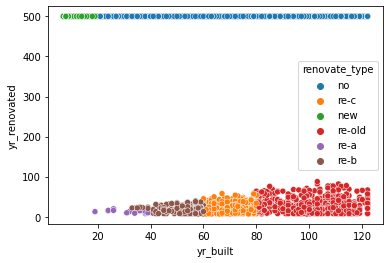

In [30]:
sns.scatterplot(data = raw, x = 'yr_built', y = 'yr_renovated', hue = 'renovate_type')

In [33]:
x = raw[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovate_type']]
y = raw['price']

In [35]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,renovate_type
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,67,500,47.5112,-122.257,1340,5650,no
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,71,31,47.7210,-122.319,1690,7639,re-c
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,89,500,47.7379,-122.233,2720,8062,no
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,57,500,47.5208,-122.393,1360,5000,no
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,35,500,47.6168,-122.045,1800,7503,no


In [39]:
x_ = pd.get_dummies(x, columns = ['waterfront', 'view', 'condition', 'grade','renovate_type']).drop(['yr_renovated'], axis = 1)

In [40]:
x_tr, x_te, y_tr, y_te = train_test_split(x_, y, train_size = .7)

In [41]:
fit_lm = LinearRegression().fit(x_tr, y_tr)
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)

In [42]:
pred_lm = fit_lm.predict(x_te)
pred_rf = fit_rf.predict(x_te)

In [44]:
mean_squared_error(y_te, pred_lm), mean_squared_error(y_te, pred_rf)

(35195006710.87634, 17272437373.76931)

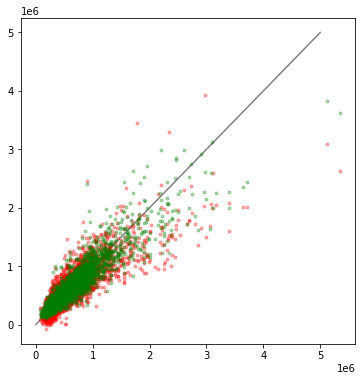

In [51]:
plt.figure(figsize = [6,6])
plt.plot([0, 5e6], [0,5e6], color = 'gray')
plt.plot(y_te, pred_lm, '.', color = 'red', alpha = .3)
plt.plot(y_te, pred_rf, '.', color = 'green', alpha = .3)